---
<h1 align="center"><span style='font-family:Georgia'> Replicate NLinear on the Four ETDataset </span></h1>
    
---

The NLinear model is a variant of the LTSF-Linear model that is designed to boost performance when there is a distribution shift in the dataset. It first subtracts the input by the last value of the sequence, then the input goes through a linear layer, and the subtracted part is added back before making the final prediction. The subtraction and addition in NLinear are a simple normalization for the input sequence.


- The *Vanilla Linear* model is a simple baseline model that directly regresses historical time series for future prediction via a weighted sum operation.

<img width="800" src="https://raw.githubusercontent.com/cure-lab/ltsf-linear/master/pics/Linear.png" alt="Vanilla Linear model" />

---
## Inputs and Outputs
---
##### **Input sequence:**
The input to the Nlinear model is a time series sequence of fixed length. The sequence contains a set of features, where each feature corresponds to a value measured at a specific time step in the sequence. 
- The length of the input sequence is defined by the `seq_len` hyperparameter.

##### **Output sequence:**

The output of the Nlinear model is a time series sequence of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence. 
- The length of the output sequence is defined by the `pred_len` hyperparameter.

---
## Methodology
---
This notebook provide a step-by-step guide for replicating the **NLinear** model and training it on the ETDataset (ETTh1, ETTh2, ETTm1, and ETTm2), ensuring accurate reproduction of the models by comparing the notebook results with the official paper results. The main foucs here is to study the *impact of number of prediction length on the performance*. The workflow from the beginning to forcasting is as follows:

### 1.	Data Preprocessing
The input sequence is normalized by subtracting the last value of the sequence. This step is performed to account for any distribution shift in the data.
$$Xnorm = x - x[-1]$$
### 2.	Linear layer
Transform the input features into output features by performing matrix multiplication between the input and a weight matrix.
$$y = wx + b$$

### 3.	Residual connection
The output of the linear layer is added to the initial normalized input sequence before making the final prediction.
$$Y = y+ x[-1]$$



---
## Hyperparameters
---

**Here are the hyperparameters that control the input and output:**

| Parameter | Description | Value |
|---|---|---|
| `args.data` | The name of the dataset to use. | 'ETTh1', 'ETTh2', 'ETTm1', and 'ETTm2'|
| `args.root_path` | The root path of the data file. | `./Datasets/` |
| `args.features` | The type of forecasting task to perform. The options are 'M' (multivariate predict multivariate), 'S' (univariate predict univariate), and 'MS' (multivariate predict univariate). | 'M'|
| `args.target` | The target feature to predict in a univariate or multivariate task. ('HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT')| 'OT' |
| `args.seq_len` | The length of the input sequence to the Informer encoder. | 336|
| `args.pred_len` | The length of the future sequence to be predicted. | [96, 192, 336, 720]|
| `args.padding` | The amount of padding to add to the input sequence, if any. | 0|
| `args.freq` |  | 'h' |
<!-- | `args.embed` | The type of time feature encoding to use. The options are 'timeF' (time features encoding), 'fixed' (fixed positional encoding), and 'learned' (learned positional encoding). | 'timeF' | -->

---------

**The following are the experiment Hyperparameters.**

| Parameter | Description | Value |
|---|---|---|
| `args.train_only` | Whether to train the model or fine-tune | True |
| `args.train_epochs` | The number of epochs to train for. | 20 |
| `args.batch_size` | The batch size of training input data. | 16 |
| `args.learning_rate` | Learning rate starts from 1e−4, decaying two times smaller every epoch. | 0.005 |
| `args.lradj` | Learning rate decayed two times smaller every epoch. | 'type1' |
| `args.loss` | Evaluating criteria | `'mse'` |
| `args.patience` | The number of epochs to wait before early stopping. | 3 |
| `args.des` | The description of the experiment. | 'Exp' |
| `args.itr` | The iteration of the experiment. | 1 |
| `args.model` | The model name | 'NLinear' |
| `args.checkpoints` | Location of model checkpoints | `'./Checkpoints/NLinear_checkpoints'` |


<!-- ##### **Input sequence:**
The input to the NLinear model is a time series sequence of fixed length. The sequence contains a set of features, where each feature corresponds to a value measured at a specific time step in the sequence. 
- The length of the input sequence is defined by the `seq_len` hyperparameter.

##### **Output sequence:**

The output of the Informer model is a time series sequence of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence. 
- The length of the output sequence is defined by the `pred_len` hyperparameter.

##### **Here are the hyperparameters that control the input and output:**

| Parameter | Description | Value |
|---|---|---|
| `args.data` | The name of the dataset to use. | 'ETTh1', 'ETTh2', 'ETTm1', and 'ETTm2'|
| `args.root_path` | The root path of the data file. | `./Datasets/` |
| `args.features` | The type of forecasting task to perform. The options are 'M' (multivariate predict multivariate), 'S' (univariate predict univariate), and 'MS' (multivariate predict univariate). | 'M'|
| `args.target` | The target feature to predict in a univariate or multivariate task. ('HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT')| 'OT' |
| `args.seq_len` | The length of the input sequence to the Informer encoder. | 336|
| `args.pred_len` | The length of the future sequence to be predicted. | [96, 192, 336, 720]|
| `args.freq` |  | 'h' | -->

---
# Setup
---

Installs the necessary libraries and dependencies required to run the code in the notebook.

**Clone the repository from github**

In [19]:
!git clone https://github.com/debi2023-group3/Transformer-based-solutions-for-the-long-term-time-series-forecasting.git

Cloning into 'Transformer-based-solutions-for-the-long-term-time-series-forecasting'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 186 (delta 73), reused 155 (delta 42), pack-reused 0
Receiving objects: 100% (186/186), 32.05 MiB | 22.69 MiB/s, done.
Resolving deltas: 100% (73/73), done.


**Add project_files to system path**

In [20]:
import os
os.chdir('Transformer-based-solutions-for-the-long-term-time-series-forecasting')

In [21]:
import sys
if not 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' in sys.path:
    sys.path += ['Transformer-based-solutions-for-the-long-term-time-series-forecasting']
    
sys.path

['/kaggle/working',
 '/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/root/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/src/bq-helper',
 'Transformer-based-solutions-for-the-long-term-time-series-forecasting']

**Important library**

In [22]:
import random
import torch
import numpy as np
%matplotlib inline
from exp.exp_NLinear import Exp_Main 

In [23]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [24]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
    
"""
    **dotdict function**
    This function is used to convert a dictionary into
    an object whose keys can be accessed as attributes
"""

args = dotdict()

**GPU Device Hyperparameters**

In [25]:
######################### Device Hyperparameters  ##########################
args.use_multi_gpu = False
args.num_workers = 0
args.use_gpu = torch.cuda.is_available() 
args.gpu = 0                           # The index of the GPU to use.

**Dataset Hyperparameters**

In [26]:
######################### Dataset Hyperparameters  ##########################
args.data = 'ETTh1'            # dataset name
args.root_path = './Datasets/' # root path of data file
args.data_path = 'ETTh1.csv'   # data file
args.features = 'M'            # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT'             # target feature in S or MS task
args.freq = 'h'                # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.embed = 'timeF'           # time features (date) encoding, options:[timeF, fixed, learned]
args.padding = 0               # the amount of padding to add to the input sequence of the Informer model

**Experiment Hyperparameters**



In [27]:
######################### Experiment Hyperparameters  ##########################

# args.output_attention = False # whether to output attention in ecoder
args.train_only = True
args.train_epochs = 30        # The number of epochs to train for.
args.batch_size = 16          # The batch size of training input data.
args.learning_rate = 0.01     # learning rate starts from 1e−4, decaying two times smaller every epoch.
args.lradj = 'type1'          # learning rate decayed two times smaller every epoch.
args.loss = 'mse'             # evaluating criteria
args.patience = 3             # The number of epochs to wait before early stopping.
args.des = 'Exp'              # The description of the experiment.
args.itr  = 1

args.model = 'NLinear' 
args.checkpoints = './Checkpoints/NLinear_checkpoints' # location of model checkpoints

**Modeling Hyperparameters**

In [28]:
args.enc_in = 7 
args.label_len = 48
args.seq_len = 336              # input sequence length of DLinear encoder
args.pred_len = 96              # prediction sequence length

---
# Working on ETTh1 Dataset
---

## Trail 1: NLinear, Dataset:ETTh1,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [29]:
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [30]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.4301068 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 33.5762 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 513 	 Train Loss: 0.4777163
     Validation loss decreased (inf --> 0.477716).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.3914378 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 31.6701 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summery  

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

test 2785
mae:0.39165255427360535, mse:0.3703766167163849, rmse:0.608585774898529, mape:9.377815246582031, mspe:38048.7578125


<Figure size 1500x500 with 0 Axes>

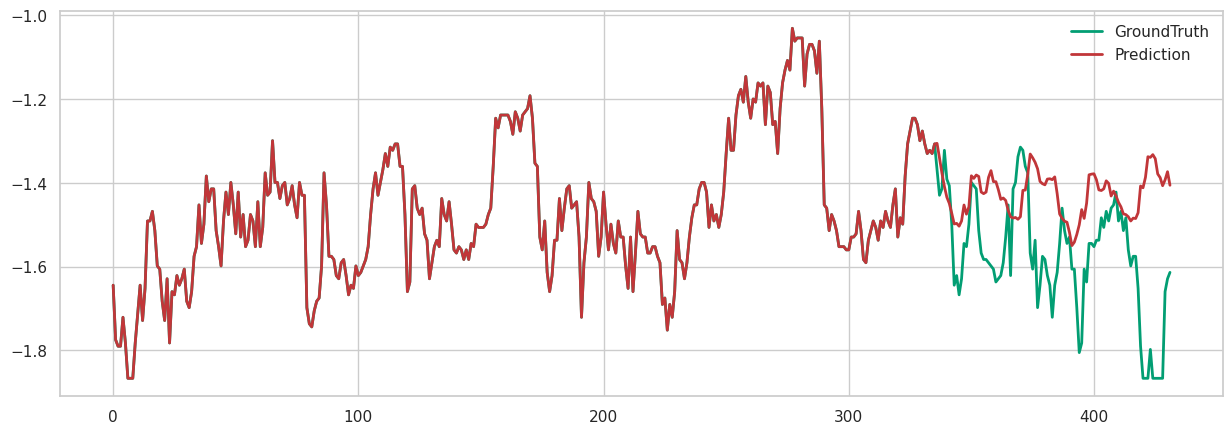

In [31]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: NLinear, Dataset:ETTh1 , Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [32]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [33]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.5067859 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 32.9081 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 507 	 Train Loss: 0.5388093
     Validation loss decreased (inf --> 0.538809).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.6865621 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 32.4974 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summery  

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

test 2689
mae:0.41129764914512634, mse:0.4035828411579132, rmse:0.6352816820144653, mape:9.234492301940918, mspe:35655.4765625


<Figure size 1500x500 with 0 Axes>

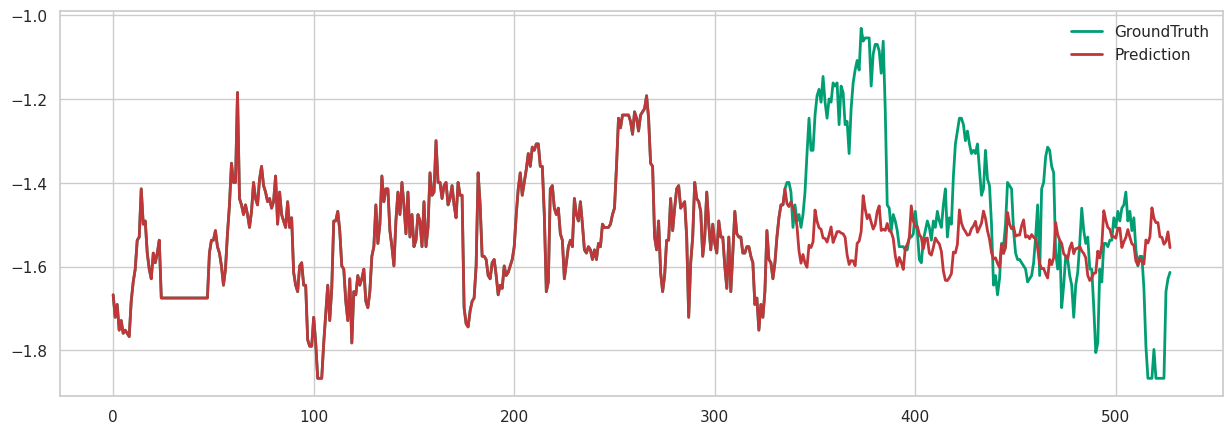

In [34]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: NLinear, Dataset:ETTh1,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [35]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [36]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
                                   Training                               
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 498 	 Train Loss: 0.6003122
     Validation loss decreased (inf --> 0.600312).  Saving model ...
Updating learning rate to 0.01
                                   Epoch 2 Summery                          
--------------------------------------------------------------------------------
     Cost time: 2
     Steps: 498 	 Train Loss: 0.5821798
     Validation loss decreased (0.600312 --> 0.582180).  Saving model ...
Updating learning rate to 0.005
                                   Epoch 3 Summery                          
--------------------------------------------------------------------------------
     Cost time: 3
     Steps: 498 	 Train Loss: 0.4981869
     Validation loss decreased (0.582180 -->

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

test 2545
mae:0.42632248997688293, mse:0.42781519889831543, rmse:0.6540758609771729, mape:9.131478309631348, mspe:34599.93359375


<Figure size 1500x500 with 0 Axes>

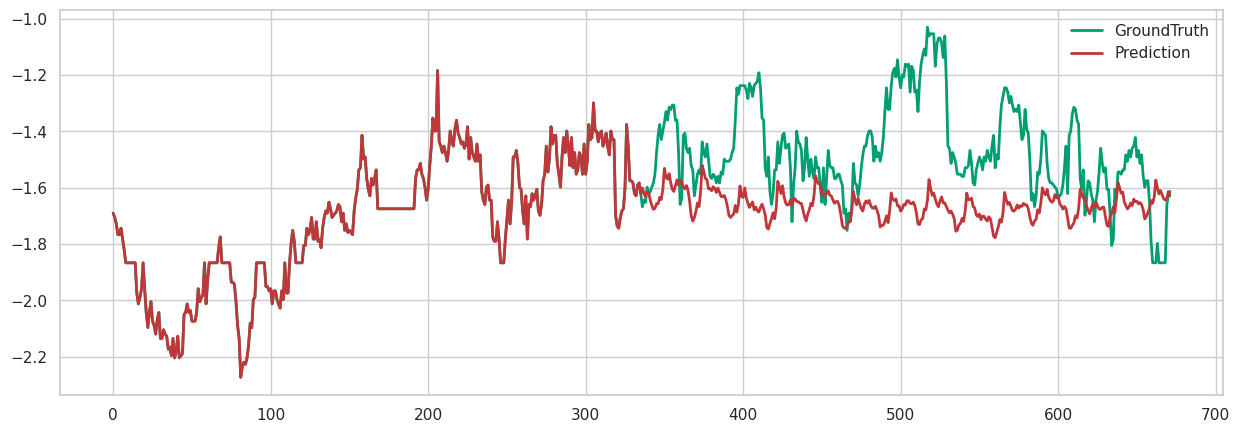

In [37]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: NLinear, Dataset:ETTh1,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [38]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh1_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh1', 'root_path': './Datasets/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [39]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
                                   Training                               
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 474 	 Train Loss: 0.7209177
     Validation loss decreased (inf --> 0.720918).  Saving model ...
Updating learning rate to 0.01
                                   Epoch 2 Summery                          
--------------------------------------------------------------------------------
     Cost time: 2
     Steps: 474 	 Train Loss: 0.6940255
     Validation loss decreased (0.720918 --> 0.694026).  Saving model ...
Updating learning rate to 0.005
                                   Epoch 3 Summery                          
--------------------------------------------------------------------------------
     Cost time: 3
     Steps: 474 	 Train Loss: 0.6204436
     Validation loss decreased (0.694026 -->

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

test 2161
mae:0.45077887177467346, mse:0.43479108810424805, rmse:0.659386932849884, mape:9.370352745056152, mspe:36040.77734375


<Figure size 1500x500 with 0 Axes>

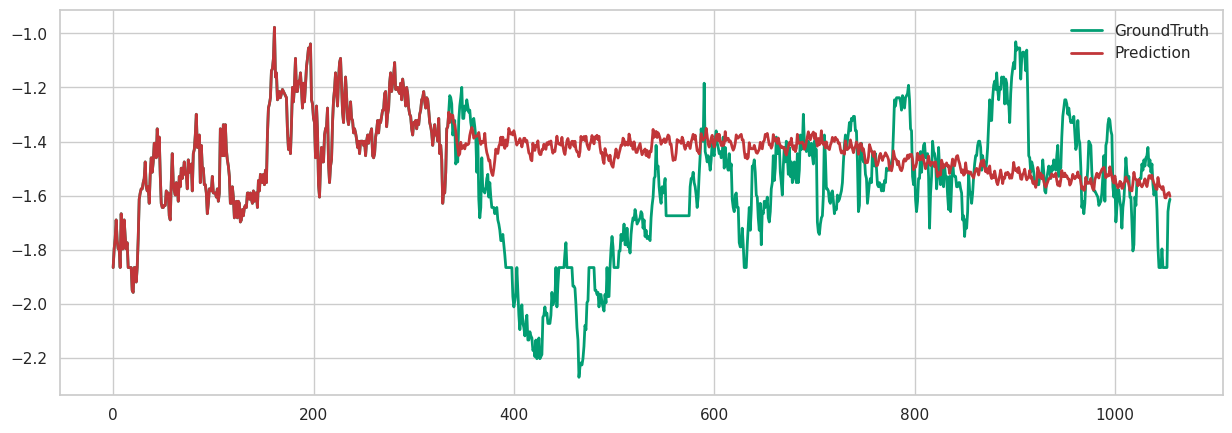

In [40]:
exp.test(setting)
torch.cuda.empty_cache()

### Conclusion



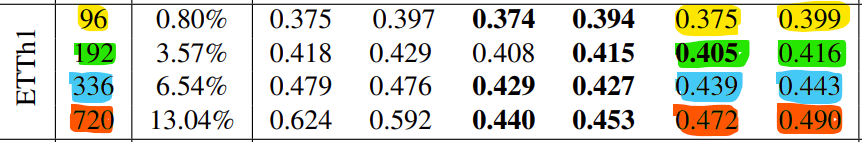

In [41]:
from IPython.display import Image
Image(filename=r"./Images/NLinear Results ETTh1.png")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| Seq_len | MSE | MAE |
|---|---|---|
| 96 | 0.37049049139022827 | 0.39179423451423645 |
| 192 | 0.4037800133228302 | 0.41151052713394165 |
| 336 | 0.42810434103012085 | 0.4264957904815674 |
| 720 | 0.43515780568122864 | 0.45103150606155396 |


---
# Working on ETTh2 Dataset
---

## Trail 1: NLinear, Dataset:ETTh2,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [42]:
args.data_path = 'ETTh2.csv' # data file
args.data = 'ETTh2'  # data
args.pred_len=96

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [43]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8209
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.4110191 (MSE)
    Speed: 0.0021 sec/iter 
    Left time: 31.9523 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 513 	 Train Loss: 0.7716037
     Validation loss decreased (inf --> 0.771604).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.2216692 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 31.9822 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summery  

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

test 2785
mae:0.3362812399864197, mse:0.2736501693725586, rmse:0.5231158137321472, mape:1.3765507936477661, mspe:341.2528076171875


<Figure size 1500x500 with 0 Axes>

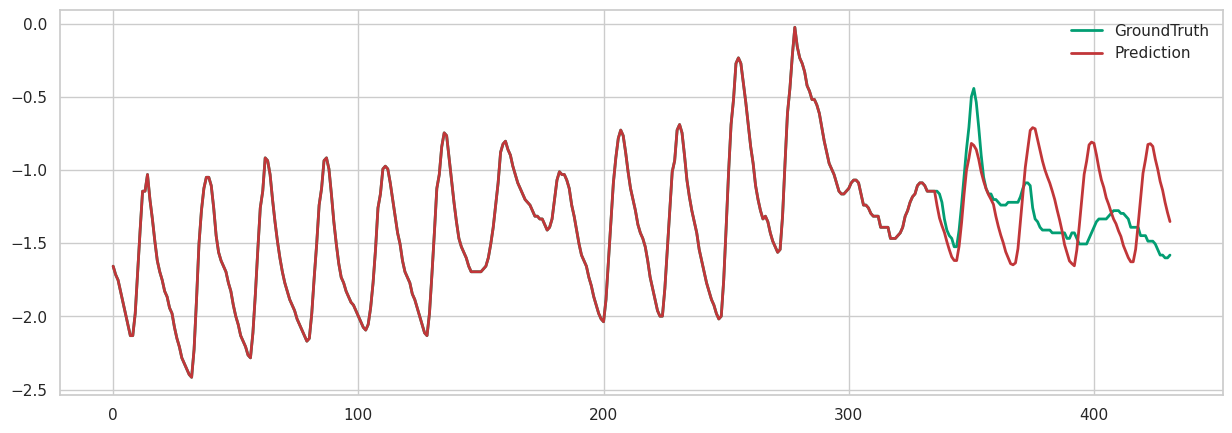

In [44]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: NLinear, Dataset: ETTh2, Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [45]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [46]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 8113
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 1.1793513 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 32.7072 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 507 	 Train Loss: 0.8317259
     Validation loss decreased (inf --> 0.831726).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.6228021 (MSE)
    Speed: 0.0024 sec/iter 
    Left time: 33.8661 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summery  

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

test 2689
mae:0.37720468640327454, mse:0.33533141016960144, rmse:0.5790780782699585, mape:1.495872974395752, mspe:342.22821044921875


<Figure size 1500x500 with 0 Axes>

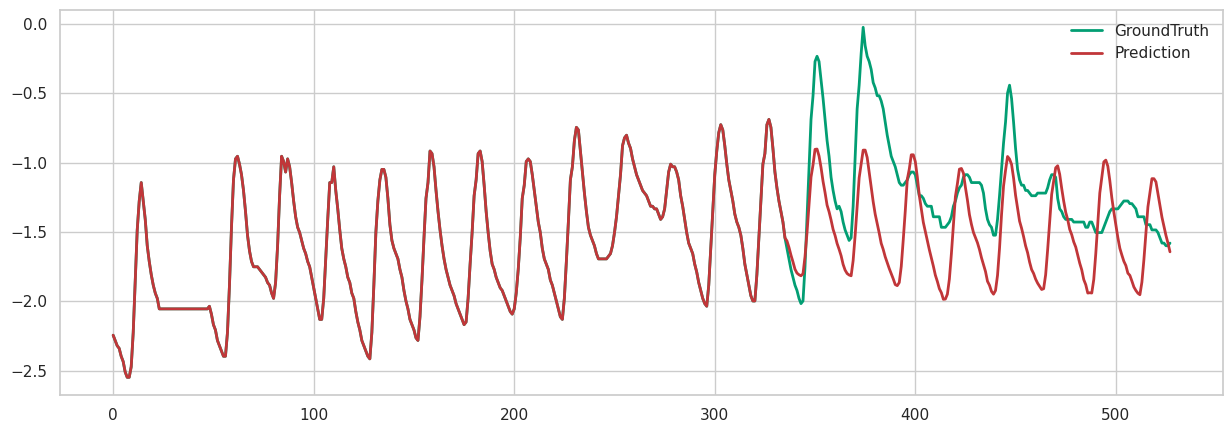

In [47]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: NLinear, Dataset:ETTh2,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [48]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [49]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7969
                                   Training                               
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 498 	 Train Loss: 1.0745860
     Validation loss decreased (inf --> 1.074586).  Saving model ...
Updating learning rate to 0.01
                                   Epoch 2 Summery                          
--------------------------------------------------------------------------------
     Cost time: 2
     Steps: 498 	 Train Loss: 0.8619433
     Validation loss decreased (1.074586 --> 0.861943).  Saving model ...
Updating learning rate to 0.005
                                   Epoch 3 Summery                          
--------------------------------------------------------------------------------
     Cost time: 3
     Steps: 498 	 Train Loss: 0.6824120
     Validation loss decreased (0.861943 -->

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

test 2545
mae:0.4016057550907135, mse:0.36061805486679077, rmse:0.600514829158783, mape:1.6939659118652344, mspe:430.33416748046875


<Figure size 1500x500 with 0 Axes>

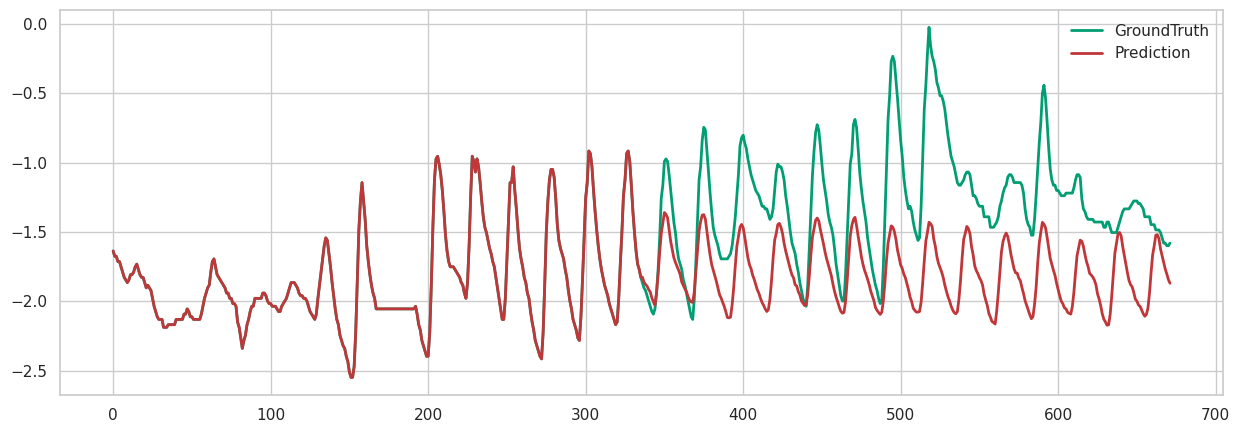

In [50]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: NLinear, Dataset:ETTh2,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [51]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTh2_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTh2', 'root_path': './Datasets/', 'data_path': 'ETTh2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [52]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 7585
                                   Training                               
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 474 	 Train Loss: 1.2478931
     Validation loss decreased (inf --> 1.247893).  Saving model ...
Updating learning rate to 0.01
                                   Epoch 2 Summery                          
--------------------------------------------------------------------------------
     Cost time: 2
     Steps: 474 	 Train Loss: 1.2440879
     Validation loss decreased (1.247893 --> 1.244088).  Saving model ...
Updating learning rate to 0.005
                                   Epoch 3 Summery                          
--------------------------------------------------------------------------------
     Cost time: 3
     Steps: 474 	 Train Loss: 0.9384195
     Validation loss decreased (1.244088 -->

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

test 2161
mae:0.43600496649742126, mse:0.39479362964630127, rmse:0.6283260583877563, mape:2.0914969444274902, mspe:670.97705078125


<Figure size 1500x500 with 0 Axes>

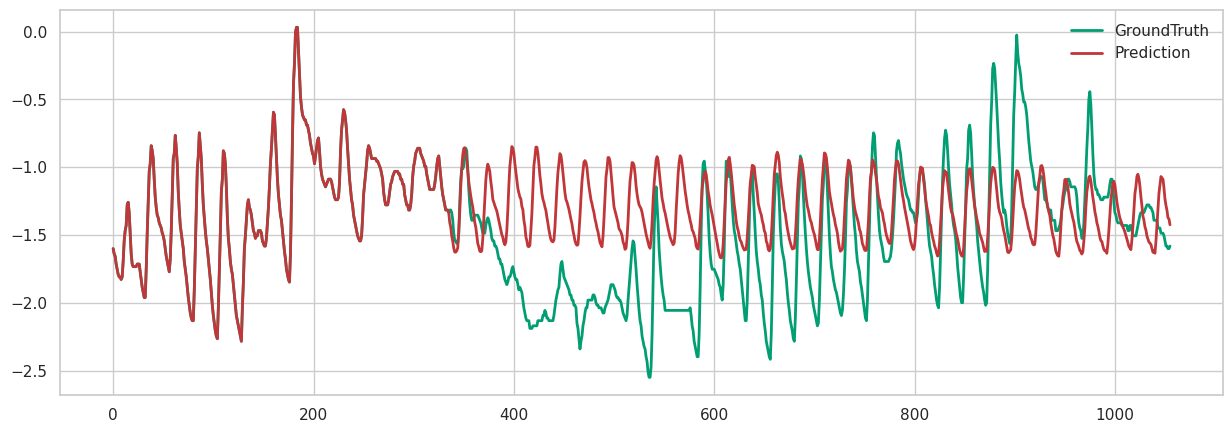

In [53]:
exp.test(setting)
torch.cuda.empty_cache()

### Conclusion



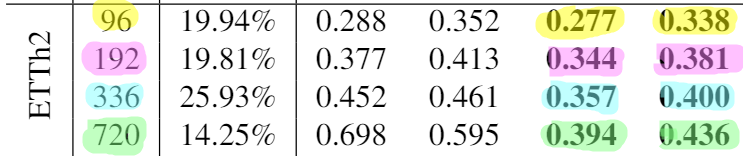

In [1]:
from IPython.display import Image
Image(filename=r"./Images/NLinear Results ETTh2.png")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| Seq_len | MSE | MAE |
|---|---|---|
| 96 | 0.37049049139022827 | 0.39179423451423645 |
| 192 | 0.4037800133228302 | 0.41151052713394165 |
| 336 | 0.42810434103012085 | 0.4264957904815674 |
| 720 | 0.43515780568122864 | 0.45103150606155396 |


---
# Working on ETTm1 Dataset
---

## Trail 1: NLinear, Dataset:ETTm1,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [55]:
args.pred_len=96
args.data_path = 'ETTm1.csv' # data file
args.data = 'ETTm1'  # data

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [56]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.3619485 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 137.4573 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.2989897 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 137.8733 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.2827573 (MSE)
    Speed: 0.0024 sec/iter 
    Left time: 147.9634 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

test 11425
mae:0.3426664471626282, mse:0.3005513846874237, rmse:0.5482256412506104, mape:2.0960798263549805, mspe:329.0276184082031


<Figure size 1500x500 with 0 Axes>

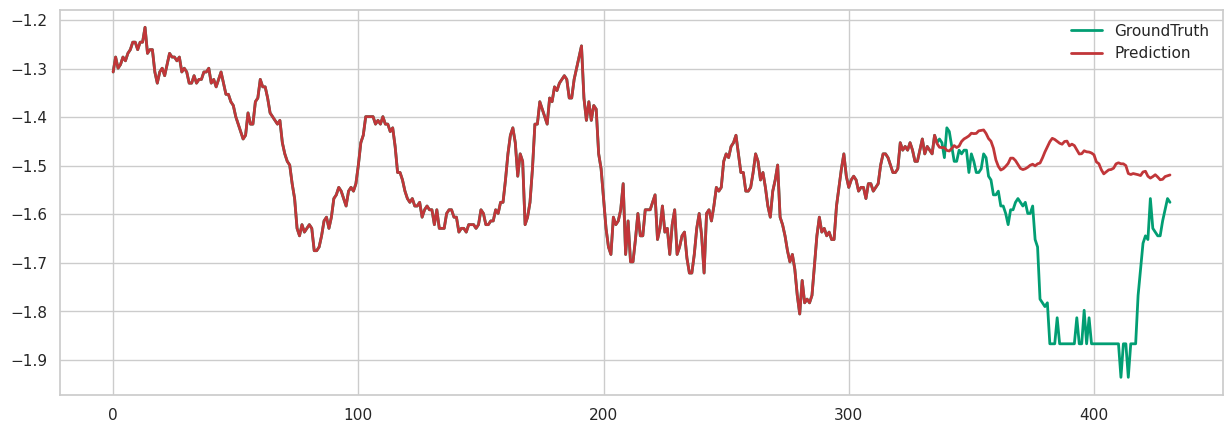

In [57]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: NLinear,Dataset:ETTm1 , Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [58]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [59]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.3097330 (MSE)
    Speed: 0.0027 sec/iter 
    Left time: 167.9467 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.4772407 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 142.6720 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.3124455 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 139.6799 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

test 11329
mae:0.36345571279525757, mse:0.33568477630615234, rmse:0.5793830752372742, mape:2.1943705081939697, mspe:362.7137451171875


<Figure size 1500x500 with 0 Axes>

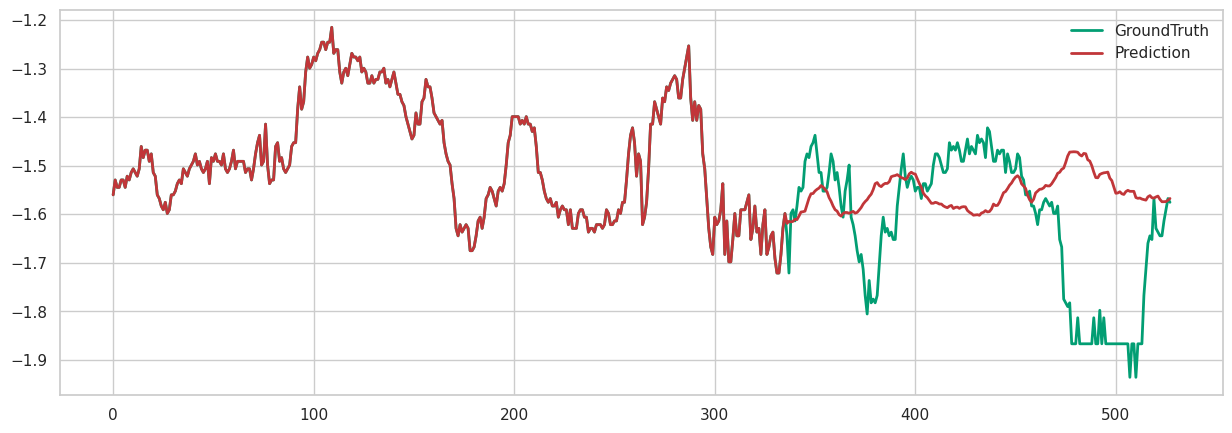

In [60]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: NLinear, Dataset:ETTm1,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [61]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [62]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.3773947 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 146.9439 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.5401561 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 142.3116 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.3418676 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 140.4871 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

test 11185
mae:0.3834194242954254, mse:0.37040600180625916, rmse:0.6086099147796631, mape:2.27756404876709, mspe:388.3809509277344


<Figure size 1500x500 with 0 Axes>

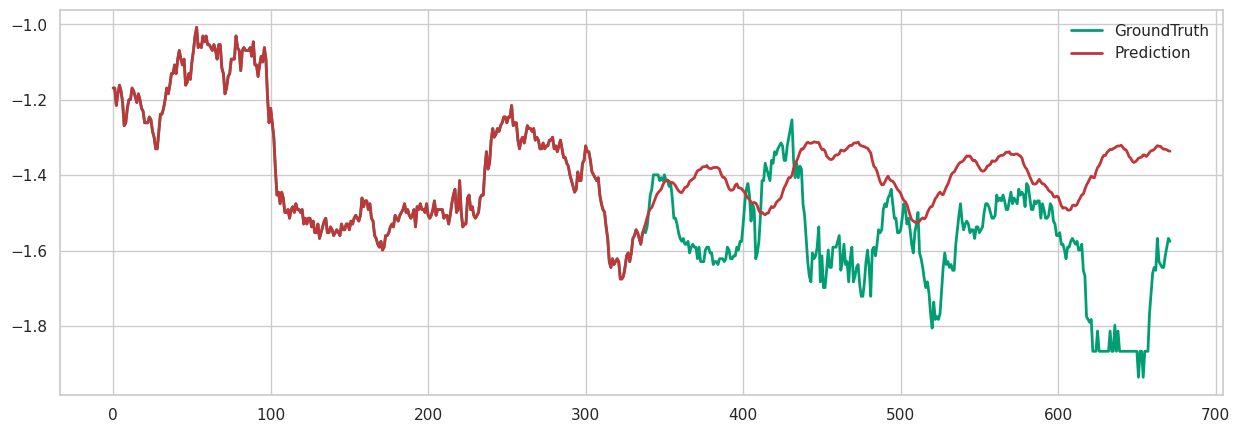

In [63]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: NLinear, Dataset:ETTm1,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [64]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm1_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm1', 'root_path': './Datasets/', 'data_path': 'ETTm1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [65]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.4910005 (MSE)
    Speed: 0.0026 sec/iter 
    Left time: 160.7488 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.5013990 (MSE)
    Speed: 0.0025 sec/iter 
    Left time: 157.1807 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.4893788 (MSE)
    Speed: 0.0026 sec/iter 
    Left time: 156.4885 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

test 10801
mae:0.41574645042419434, mse:0.4263491928577423, rmse:0.6529542207717896, mape:2.44987154006958, mspe:447.704345703125


<Figure size 1500x500 with 0 Axes>

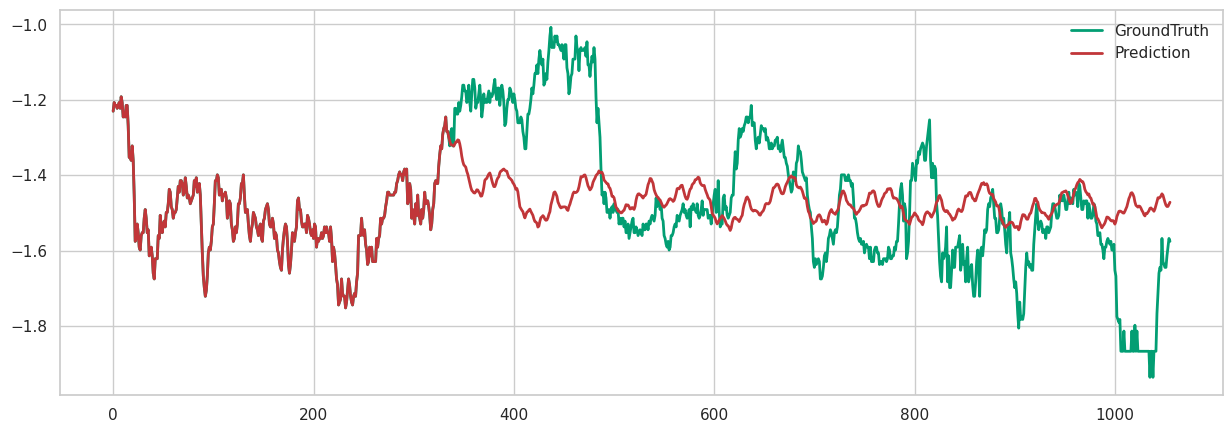

In [66]:
exp.test(setting)
torch.cuda.empty_cache()

### Conclusion



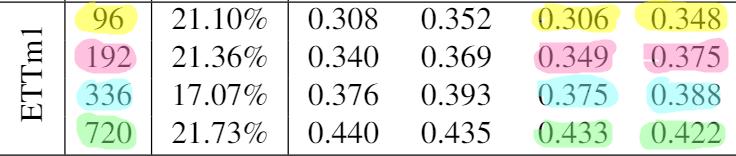

In [2]:
from IPython.display import Image
Image(filename=r"./Images/NLinear Results ETTm1.png")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| Seq_len | MSE | MAE |
|---|---|---|
| 96 | 0.37049049139022827 | 0.39179423451423645 |
| 192 | 0.4037800133228302 | 0.41151052713394165 |
| 336 | 0.42810434103012085 | 0.4264957904815674 |
| 720 | 0.43515780568122864 | 0.45103150606155396 |


---
# Working on ETTm2 Dataset
---

## Trail 1: NLinear, Dataset:ETTm2,  Metric = 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [68]:
args.pred_len=96
args.data_path = 'ETTm2.csv' # data file
args.data = 'ETTm2'  # data

setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 96}


### Training

In [69]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34129
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 1.0660205 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 141.1989 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0982437 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 136.3335 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.2897702 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 138.2483 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=96, bias=True)
)

### Testing

test 11425
mae:0.253823846578598, mse:0.16473110020160675, rmse:0.40587079524993896, mape:1.0772624015808105, mspe:224.51063537597656


<Figure size 1500x500 with 0 Axes>

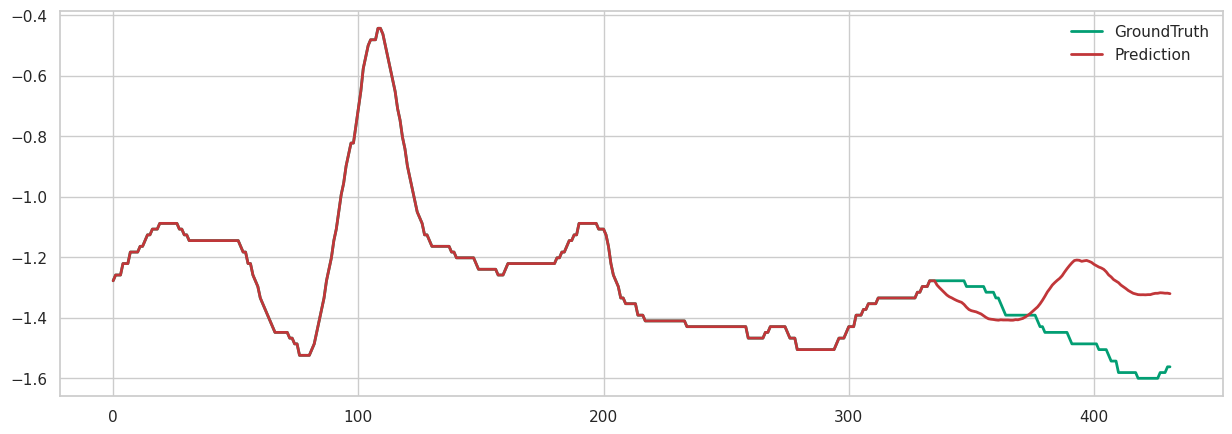

In [70]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 2: NLinear,  Metric = 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [71]:
args.pred_len=192
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 192}


### Training

In [72]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 34033
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.2908255 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 141.4360 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.2730452 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 137.5010 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.2795253 (MSE)
    Speed: 0.0022 sec/iter 
    Left time: 138.3323 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=192, bias=True)
)

### Testing

test 11329
mae:0.29133540391921997, mse:0.21994318068027496, rmse:0.468980997800827, mape:1.2049970626831055, mspe:247.4779815673828


<Figure size 1500x500 with 0 Axes>

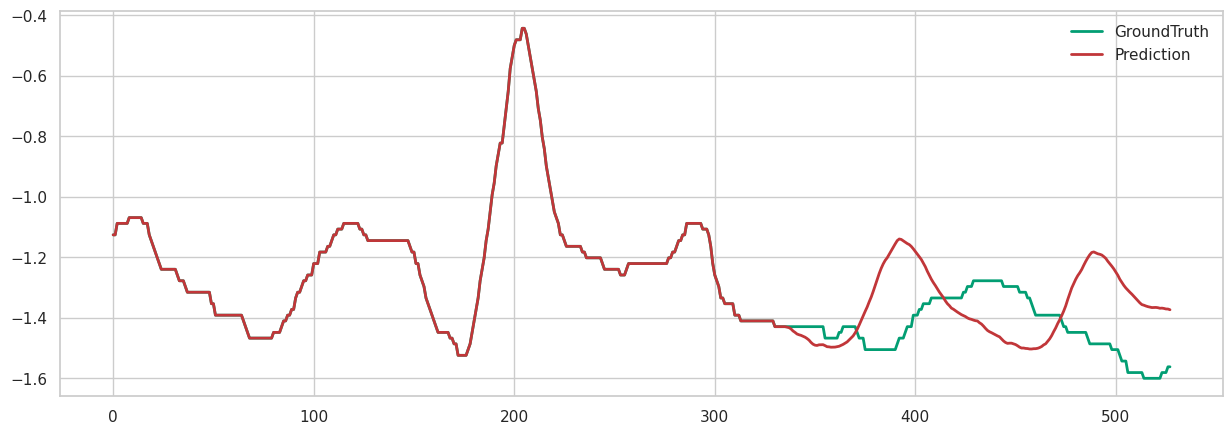

In [73]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 3: NLinear, Dataset:ETTm2,  Metric = 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [74]:
args.pred_len=336
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 336}


### Training

In [75]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33889
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.3338152 (MSE)
    Speed: 0.0024 sec/iter 
    Left time: 149.0065 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.2638611 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 143.8737 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 1.1302422 (MSE)
    Speed: 0.0023 sec/iter 
    Left time: 143.2377 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=336, bias=True)
)

### Testing

test 11185
mae:0.32639965415000916, mse:0.27358773350715637, rmse:0.523056149482727, mape:1.3191649913787842, mspe:272.9044189453125


<Figure size 1500x500 with 0 Axes>

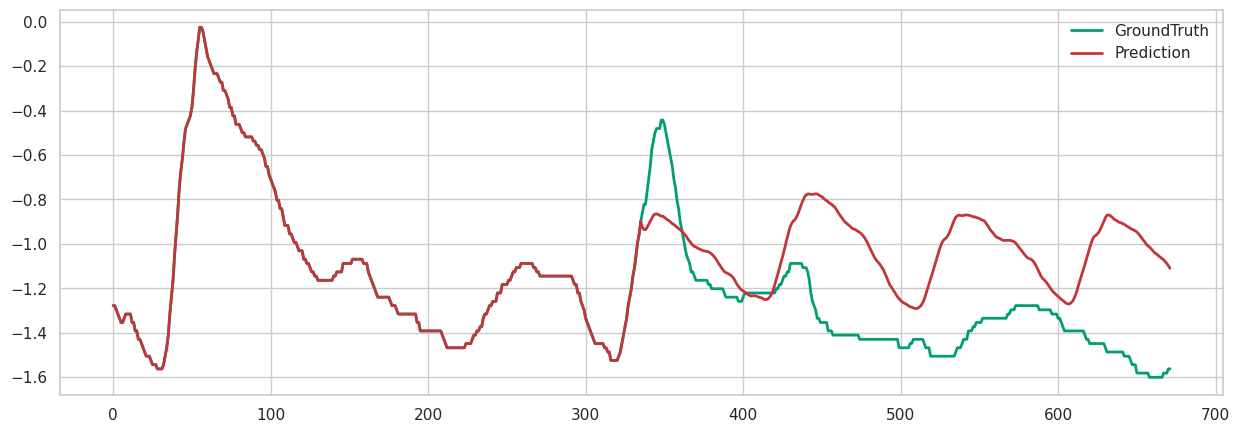

In [76]:
exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: NLinear, Dataset:ETTm2,  Metric = 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [77]:
args.pred_len=720
setting=f'{args.model}_train_on_{args.data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_ETTm2_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'ETTm2', 'root_path': './Datasets/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'embed': 'timeF', 'padding': 0, 'train_only': True, 'train_epochs': 30, 'batch_size': 16, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints', 'enc_in': 7, 'label_len': 48, 'seq_len': 336, 'pred_len': 720}


### Training

In [78]:
Exp = Exp_Main
exp = Exp(args)
exp.train(setting)

Use GPU: cuda:0
train 33505
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.4170822 (MSE)
    Speed: 0.0027 sec/iter 
    Left time: 165.5237 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.4057374 (MSE)
    Speed: 0.0026 sec/iter 
    Left time: 161.4980 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1500
--------------------------------------------------------------------------------
    Loss : 0.6002108 (MSE)
    Speed: 0.0026 sec/iter 
    Left time: 158.7758 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 2000
---------------------------------------------------------------------------

Model(
  (Linear): Linear(in_features=336, out_features=720, bias=True)
)

### Testing

test 10801
mae:0.38327735662460327, mse:0.36758023500442505, rmse:0.606283962726593, mape:1.4783084392547607, mspe:290.48712158203125


<Figure size 1500x500 with 0 Axes>

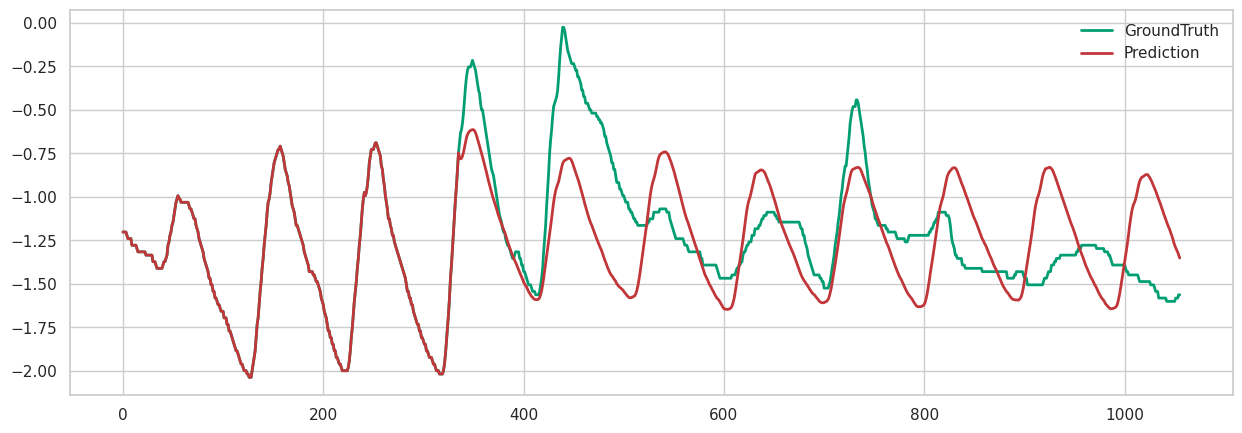

In [79]:
exp.test(setting)
torch.cuda.empty_cache()

### Conclusion



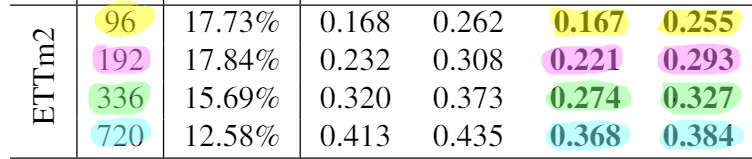

In [3]:
from IPython.display import Image
Image(filename=r"./Images/NLinear Results ETTm2.png")

#### **Experiment Results**:
Comaparing my results with the paper resulted highlited in the image above.

| Seq_len | MSE | MAE |
|---|---|---|
| 96 | 0.37049049139022827 | 0.39179423451423645 |
| 192 | 0.4037800133228302 | 0.41151052713394165 |
| 336 | 0.42810434103012085 | 0.4264957904815674 |
| 720 | 0.43515780568122864 | 0.45103150606155396 |
